In [2]:
using Catlab, Catlab.CategoricalAlgebra, Catlab.Programs, Catlab.WiringDiagrams, Catlab.Graphics 
using AlgebraicPetri 
using AlgebraicDynamics.UWDDynam 

using DifferentialEquations 

using LabelledArrays 
using Plots

In [12]:
#trial system
eqn1 = Open(LabelledPetriNet(
        [:n2o4, :no2],
        :decay_n2o4 => ((:n2o4) => (:no2)),
        :decay1_no2 => ((:no2) => (:n2o4))
        ))

eqn2 = Open(LabelledPetriNet(
        [:no2, :n2, :o2],
        :decay2_no2 => ((:no2) => (:n2, :o2))
        ))

StructuredMulticospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{AnonACSet{TypeLevelBasicSchema{Symbol, Tuple{:S}, Tuple{}, Tuple{:Name}, Tuple{(:sname, :S, :Name)}, Tuple{}}, Tuple{Symbol}, @NamedTuple{S::IntParts, Name::IntParts}, @NamedTuple{sname::ACSets.ColumnImplementations.DenseColumn{Union{AttrVar, Symbol}, Vector{Union{AttrVar, Symbol}}}}, IntParts}, LabelledPetriNet}, SMulticospan{3, LabelledPetriNet, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:T, :S, :I, :O}, Tuple{(:it, :I, :T), (:is, :I, :S), (:ot, :O, :T), (:os, :O, :S)}, Tuple{:Name}, Tuple{(:tname, :T, :Name), (:sname, :S, :Name)}, Tuple{}}, @NamedTuple{T::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, S::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, I::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Cat

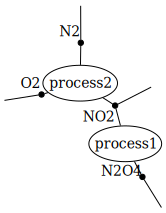

In [13]:
graph = @relation (N2O4, NO2, N2, O2) where (N2O4, NO2, N2, O2) begin
    process1(N2O4, NO2)
    process2(NO2, N2, O2)
end
to_graphviz(graph, box_labels = :name, junction_labels = :variable)

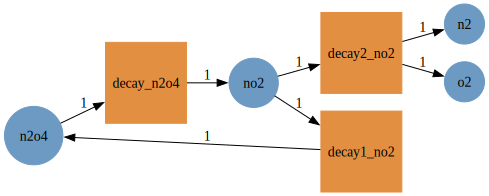

In [14]:
diagram = oapply(graph, 
    Dict(   :process1 => eqn1, :process2 => eqn2)
)

to_graphviz(diagram, program="neato")

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase C:\Users\DELL\.julia\packages\SciMLBase\8XHkk\src\performance_warnings.jl:32


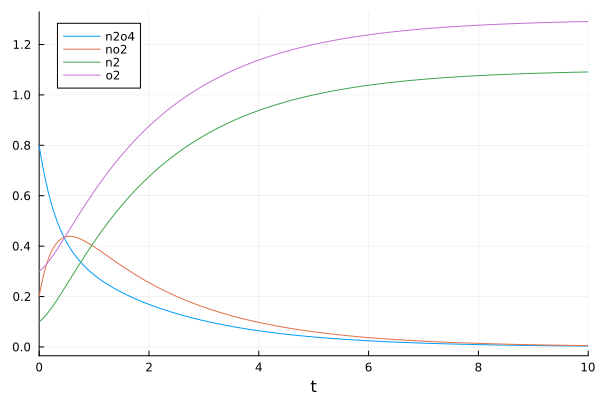

In [15]:
p = LVector(decay_n2o4=2, decay1_no2=1, decay2_no2=0.8)
u0 = LVector(n2o4=0.8, no2=0.2, n2=0.1, o2=0.3)
soln = solve(ODEProblem(vectorfield(apex(diagram)), u0, (0.0, 10.0), p))
plot(soln)